# Cambodia Country

In [1]:
import pandas as pd
from pathlib import Path
import datetime

import math
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
menhap_df = pd.read_excel("D:/PENS/Semester_4/Data Mining/PBL_Datamining/final_data.xlsx")
menhap_df

,country,year,Schizophrenia,Bipolar,Eating_Disorders,Anxiety,Drug_Use,Depression,Alcohol_Use,Life_Ladder,Log_GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Generosity,Corruption,Positive_Affect,Negative_Affect,Ladder_Std_Dev,GINI_Index
0,Brunei,1990,0.274544,0.617719,0.550731,3.548453,0.911231,2.577977,0.771017,6.233732,10.826301,0.790585,70.994705,0.767580,0.073472,0.062403,0.569497,0.166263,2.052102,0.622453
1,Brunei,1991,0.273819,0.618347,0.548010,3.554565,0.910156,2.562828,0.770862,6.437663,11.145486,0.793567,73.141360,0.789073,0.054550,0.226984,0.550824,0.112444,2.006036,0.584078
2,Brunei,1992,0.273212,0.618986,0.545544,3.561621,0.910287,2.551382,0.770430,6.586561,10.776199,0.823234,73.563922,0.787172,0.043634,0.148619,0.712836,0.185052,2.053332,0.560275
3,Brunei,1993,0.272736,0.619673,0.543644,3.569155,0.910409,2.543804,0.769584,6.821280,11.119712,0.811811,71.970894,0.801130,0.071169,0.054491,0.472039,0.127140,2.031076,0.612157
4,Brunei,1994,0.272383,0.620342,0.542626,3.576319,0.908915,2.538465,0.768343,6.192638,10.400065,0.752147,73.270498,0.705897,0.086336,0.107812,0.650715,0.138546,2.073008,0.559053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Vietnam,2013,0.241026,0.550479,0.119353,2.039645,0.673579,2.884934,1.722689,5.022699,8.541249,0.759477,65.545815,0.919607,-0.024637,0.771246,0.718431,0.165225,1.404304,0.381849
304,Vietnam,2014,0.241883,0.551005,0.121583,2.045305,0.677829,2.882767,1.728448,5.084923,8.588622,0.792168,65.677925,0.845240,0.002126,0.779896,0.701386,0.240607,1.769163,0.414816
305,Vietnam,2015,0.242783,0.551548,0.123609,2.051937,0.682933,2.881750,1.733233,5.076315,8.642591,0.848677,65.810028,0.897333,0.087220,0.747188,0.642237,0.232416,1.794858,0.398138
306,Vietnam,2016,0.243709,0.552084,0.126256,2.059037,0.687896,2.879813,1.736929,5.062267,8.692120,0.876324,65.942139,0.894351,-0.088430,0.799240,0.536226,0.222550,1.767819,0.375812


In [3]:
menhap_df.dtypes

country                object
year                    int64
Schizophrenia         float64
Bipolar               float64
Eating_Disorders      float64
Anxiety               float64
Drug_Use              float64
Depression            float64
Alcohol_Use           float64
Life_Ladder           float64
Log_GDP_per_Capita    float64
Social_Support        float64
Life_Expectancy       float64
Freedom               float64
Generosity            float64
Corruption            float64
Positive_Affect       float64
Negative_Affect       float64
Ladder_Std_Dev        float64
GINI_Index            float64
dtype: object

In [4]:
lifeladder_df = menhap_df.loc[:, ["year", 'country', 'Life_Ladder']]
lifeladder_df

,year,country,Life_Ladder
0,1990,Brunei,6.233732
1,1991,Brunei,6.437663
2,1992,Brunei,6.586561
3,1993,Brunei,6.821280
4,1994,Brunei,6.192638
...,...,...,...
303,2013,Vietnam,5.022699
304,2014,Vietnam,5.084923
305,2015,Vietnam,5.076315
306,2016,Vietnam,5.062267


In [5]:
# Mengambil data untuk country tertentu
data_df = lifeladder_df.loc[lifeladder_df['country'] == 'Cambodia']
data_df['year'] = pd.to_datetime(data_df['year'], format='%Y')
data_df = pd.Series(data_df['Life_Ladder'].values, index=data_df.year, name='Life_Ladder')
data_df.index = pd.DatetimeIndex(data_df.index, 
                                      freq=data_df.index.inferred_freq)

data_df

C:\Users\DELL\AppData\Local\Temp\ipykernel_4128\3438626680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['year'] = pd.to_datetime(data_df['year'], format='%Y')


year
1990-01-01    4.287445
1991-01-01    3.610260
1992-01-01    4.269894
1993-01-01    3.941301
1994-01-01    3.728767
1995-01-01    3.781347
1996-01-01    4.014408
1997-01-01    3.838834
1998-01-01    3.745590
1999-01-01    4.028608
2000-01-01    4.084781
2001-01-01    3.643476
2002-01-01    4.246293
2003-01-01    4.000078
2004-01-01    4.003633
2005-01-01    3.973271
2006-01-01    3.568745
2007-01-01    4.155971
2008-01-01    4.462164
2009-01-01    4.110626
2010-01-01    4.141072
2011-01-01    4.161225
2012-01-01    3.898707
2013-01-01    3.674467
2014-01-01    3.883306
2015-01-01    4.162165
2016-01-01    4.461259
2017-01-01    3.894271
Freq: AS-JAN, Name: Life_Ladder, dtype: float64

In [6]:
data_list = data_df.tolist()
data_list

[4.287445372539283,
 3.61026029395873,
 4.269894030546196,
 3.94130137341422,
 3.728767147731372,
 3.781346687135874,
 4.014408179608687,
 3.838833837239663,
 3.74558951298665,
 4.028607605464011,
 4.084781438182822,
 3.643476479884942,
 4.24629267364818,
 4.000078358813044,
 4.003633365976009,
 3.973270872992262,
 3.568744659423828,
 4.155971050262451,
 4.462163925170898,
 4.110625743865967,
 4.141072273254395,
 4.161225318908691,
 3.898706912994385,
 3.674466848373413,
 3.883305549621582,
 4.162164688110352,
 4.461259365081787,
 3.894270917937586]

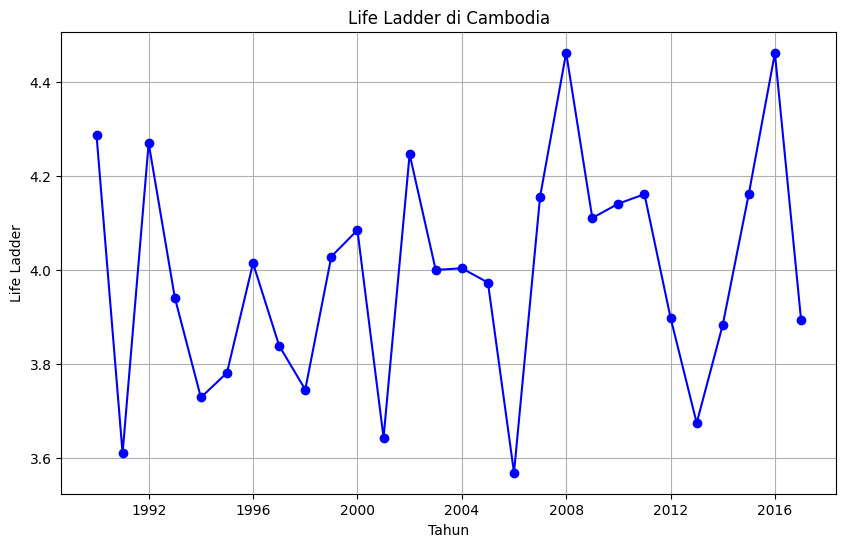

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(data_df.index, data_list, marker='o', linestyle='-', color='b')
plt.title('Life Ladder di Cambodia')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.grid(True)
plt.show()

### model SES

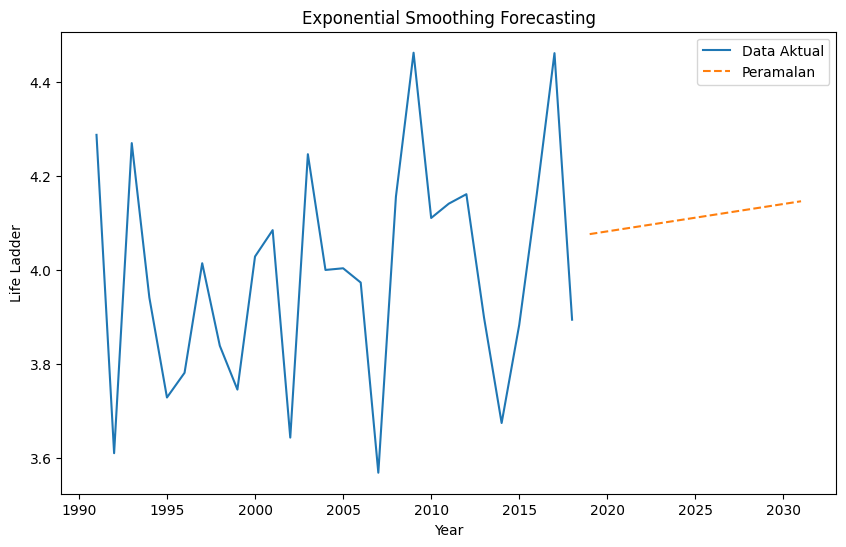

            forecast
2018-12-31  4.076314
2019-12-31  4.082139
2020-12-31  4.087964
2021-12-31  4.093789
2022-12-31  4.099614
2023-12-31  4.105439
2024-12-31  4.111264
2025-12-31  4.117089
2026-12-31  4.122914
2027-12-31  4.128739
2028-12-31  4.134564
2029-12-31  4.140389
2030-12-31  4.146213


In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(data_list), freq='Y')
life_ladder_series = pd.Series(data_list, index=years)

# Buat model Exponential Smoothing
model = ExponentialSmoothing(life_ladder_series, trend='add', seasonal=None, seasonal_periods=None)
fit = model.fit()

# Buat prediksi untuk beberapa tahun ke depan
forecast_steps = 13
forecast = fit.forecast(steps=forecast_steps)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(forecast, label='Peramalan', linestyle='--')
plt.legend(loc='best')
plt.title('Exponential Smoothing Forecasting')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
forecast_years = pd.date_range(start=years[-1] + pd.offsets.YearBegin(), periods=forecast_steps, freq='Y')
forecast_df = pd.DataFrame({'forecast': forecast})

print(forecast_df)


### Moving Average

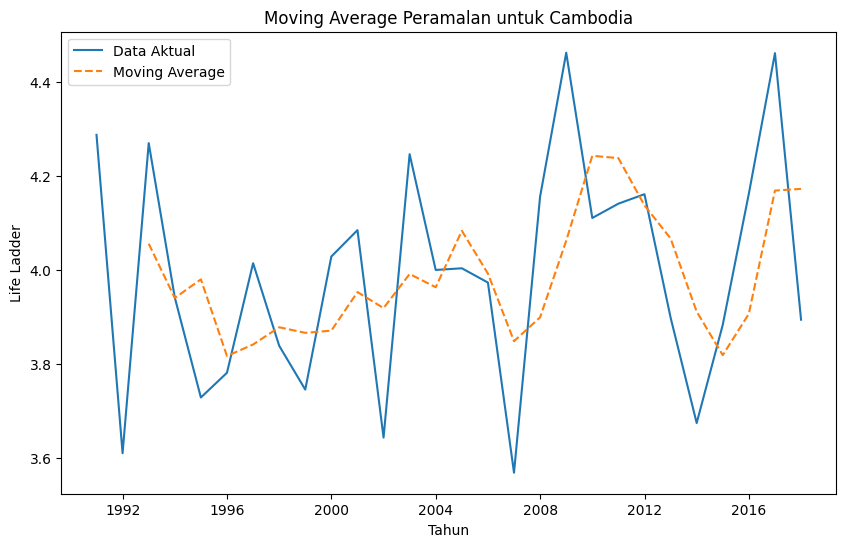

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(data_list), freq='Y')
life_ladder_series = pd.Series(data_list, index=years)

# Hitung Moving Average (misalnya dengan jendela waktu 3 tahun)
window_size = 3
moving_average = life_ladder_series.rolling(window=window_size).mean()

# Plot hasilnya
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(moving_average, label='Moving Average', linestyle='--')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Cambodia')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

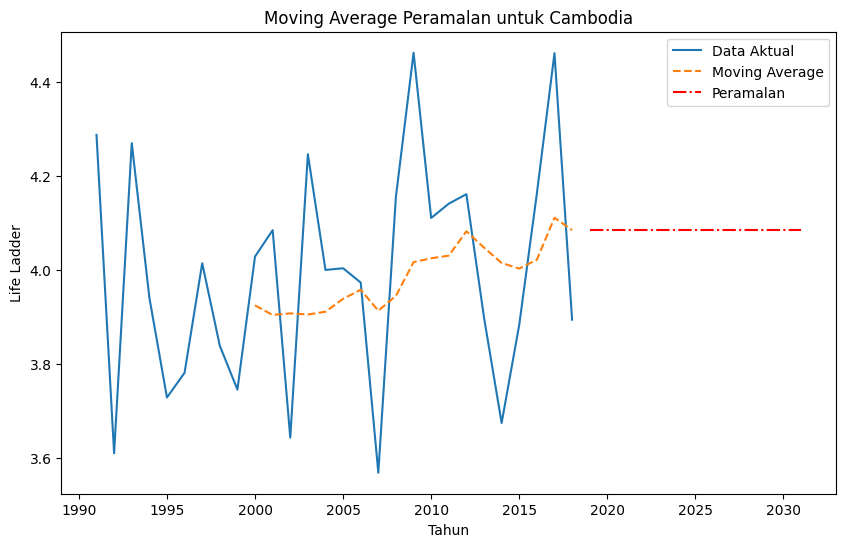

            forecast
year                
2018-12-31  4.084926
2019-12-31  4.084926
2020-12-31  4.084926
2021-12-31  4.084926
2022-12-31  4.084926
2023-12-31  4.084926
2024-12-31  4.084926
2025-12-31  4.084926
2026-12-31  4.084926
2027-12-31  4.084926
2028-12-31  4.084926
2029-12-31  4.084926
2030-12-31  4.084926


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(data_list), freq='Y')
life_ladder_series = pd.Series(data_list, index=years)

# Hitung Moving Average (misalnya dengan jendela waktu 10 tahun)
window_size = 10
moving_average = life_ladder_series.rolling(window=window_size).mean()

# Prediksi 10 tahun ke depan
last_moving_avg = moving_average.iloc[-1]
forecast_years = pd.date_range(start=life_ladder_series.index[-1] + pd.DateOffset(years=1), periods=13, freq='Y')
forecast_values = np.full(13, last_moving_avg)

# Buat DataFrame untuk prediksi
forecast_ma = pd.DataFrame({'year': forecast_years, 'forecast': forecast_values})
forecast_ma.set_index('year', inplace=True)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(moving_average, label='Moving Average', linestyle='--')
plt.plot(forecast_ma, label='Peramalan', linestyle='-.', color='red')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Cambodia')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
print(forecast_ma)

### linear regresion

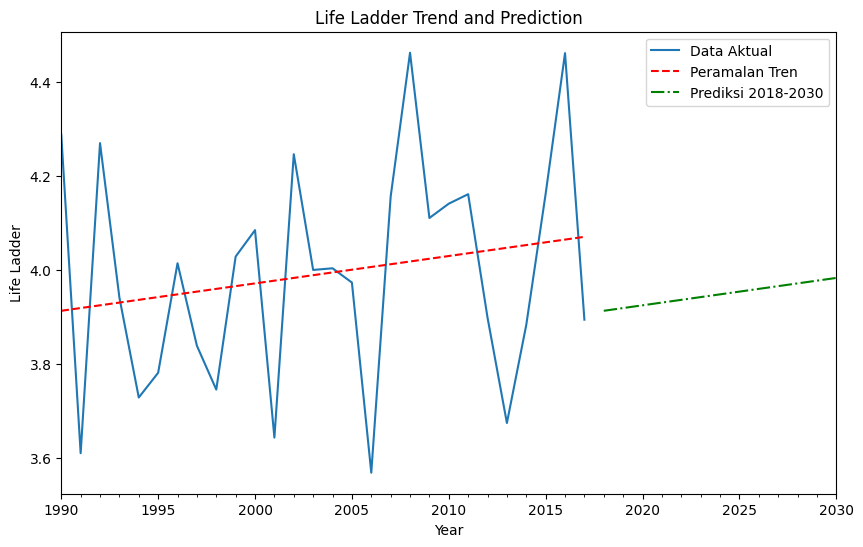

2018-12-31    3.913217
2019-12-31    3.919042
2020-12-31    3.924867
2021-12-31    3.930692
2022-12-31    3.936517
2023-12-31    3.942343
2024-12-31    3.948168
2025-12-31    3.953993
2026-12-31    3.959818
2027-12-31    3.965643
2028-12-31    3.971468
2029-12-31    3.977293
2030-12-31    3.983118
Freq: A-DEC, dtype: float64


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa import tsatools

# Membuat data Life Ladder dari daftar yang ada
years = pd.date_range(start='1990', periods=len(data_list), freq='Y')
life_ladder_series = pd.Series(data_list, index=years, name='Life_Ladder')

# Menambahkan tren
data_df = tsatools.add_trend(life_ladder_series, trend='ct')

# Membangun model regresi linear
data_lm = sm.OLS(data_df['Life_Ladder'], data_df[['trend', 'const']]).fit()

# Membuat data untuk prediksi dari 2018 sampai 2030
forecast_years = pd.date_range(start='2018', end='2031', freq='Y')
forecast_df = pd.DataFrame(index=forecast_years)
forecast_df = tsatools.add_trend(forecast_df, trend='ct')

# Membuat prediksi
forecast_values = data_lm.predict(forecast_df[['trend', 'const']])

# Plot hasil
plt.figure(figsize=(10, 6))
ax = life_ladder_series.plot(title='Life Ladder Trend and Prediction')
data_lm.predict(data_df[['trend', 'const']]).plot(ax=ax, linestyle='--', color='red')
forecast_values.plot(ax=ax, linestyle='-.', color='green')
ax.set_xlabel('Year')
ax.set_ylabel('Life Ladder')
plt.legend(['Data Aktual', 'Peramalan Tren', 'Prediksi 2018-2030'])
plt.show()

# Menampilkan prediksi
print(forecast_values)


In [12]:
import pandas as pd
from pathlib import Path
import datetime

import math
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [13]:
# Mengambil data untuk country tertentu
brunei_df = lifeladder_df.loc[lifeladder_df['country'] == 'Brunei']
brunei_df

,year,country,Life_Ladder
0,1990,Brunei,6.233732
1,1991,Brunei,6.437663
2,1992,Brunei,6.586561
3,1993,Brunei,6.821280
4,1994,Brunei,6.192638
5,1995,Brunei,6.348373
6,1996,Brunei,6.734922
7,1997,Brunei,6.597460
8,1998,Brunei,6.598677
9,1999,Brunei,6.680745


### ARIMA

Forecast for Cambodia's Life Ladder (2018-2030):
            forecast
2018-12-31  3.997537
2019-12-31  3.995390
2020-12-31  3.995435
2021-12-31  3.995434
2022-12-31  3.995434
2023-12-31  3.995434
2024-12-31  3.995434
2025-12-31  3.995434
2026-12-31  3.995434
2027-12-31  3.995434
2028-12-31  3.995434
2029-12-31  3.995434
2030-12-31  3.995434


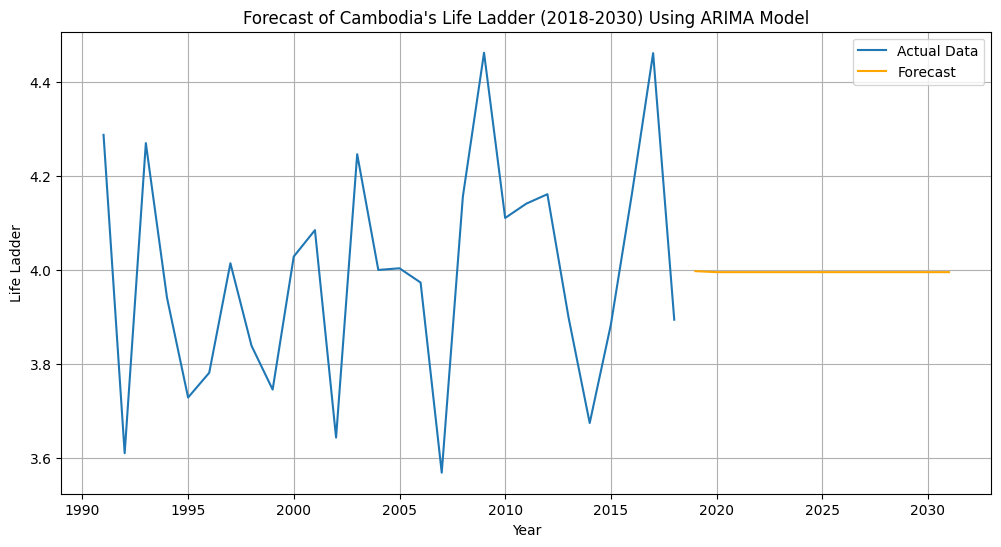

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Konversi life_ladder_list menjadi Series dengan index tahun
years = pd.date_range(start='1990', periods=len(data_list), freq='Y')
life_ladder_series = pd.Series(data_list, index=years)

# Misalkan model ARIMA yang sudah kita latih sebelumnya adalah ARIMA(1,1,1)
model = ARIMA(life_ladder_series, order=(1, 1, 1))
model_fit = model.fit()

# Melakukan peramalan untuk 14 tahun ke depan (dari tahun 2018 hingga 2030)
forecast = model_fit.forecast(steps=13)

# Tampilkan hasil peramalan
print("Forecast for Cambodia's Life Ladder (2018-2030):")
forecast_arima = pd.DataFrame({'forecast': forecast})
print(forecast_arima)

# Visualisasikan hasil peramalan
plt.figure(figsize=(12, 6))
plt.plot(life_ladder_series, label='Actual Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.title("Forecast of Cambodia's Life Ladder (2018-2030) Using ARIMA Model")
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.legend()
plt.grid(True)
plt.show()

forecast_arima.to_excel("D:\PENS\Semester_4\Data Mining\PBL_Datamining\hasil_forecast\cambodia_for_arima.xlsx", index=False)

## Evaluation Model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Buat DataFrame baru dengan life_ladder_list dan tahun sebagai indeks
data_df_new = pd.DataFrame({'Life_Ladder': data_list}, index=years)

# Bagi data menjadi set pelatihan dan pengujian (70:30)
X = data_df_new.index.year.values.reshape(-1, 1)  # Ambil tahun dari indeks DataFrame
y = data_df_new['Life_Ladder'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Regresi Linier
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
forecast_lr = model_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, forecast_lr)
mape_lr = np.mean(np.abs((y_test - forecast_lr) / y_test)) * 100
rmse_lr = np.sqrt(mean_squared_error(y_test, forecast_lr))


In [16]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi set pelatihan dan pengujian (70:30)
X = life_ladder_series.index.to_numpy().reshape(-1, 1)  # Menggunakan tahun sebagai fitur
y = life_ladder_series.values  # Life Ladder sebagai target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model SES
model_ses = ExponentialSmoothing(y_train, trend='add', seasonal=None, seasonal_periods=None)
fit_ses = model_ses.fit()
forecast_ses = fit_ses.forecast(steps=len(X_test))
mae_ses = mean_absolute_error(y_test, forecast_ses)
mape_ses = np.mean(np.abs((y_test - forecast_ses) / y_test)) * 100
rmse_ses = np.sqrt(mean_squared_error(y_test, forecast_ses))

# Model ARIMA
model_arima = ARIMA(y_train, order=(1, 1, 1))
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(steps=len(X_test))
mae_arima = mean_absolute_error(y_test, forecast_arima)
mape_arima = np.mean(np.abs((y_test - forecast_arima) / y_test)) * 100
rmse_arima = np.sqrt(mean_squared_error(y_test, forecast_arima))

# Model MA
window_size = 3
data_df['Moving Average'] = data_df['Life_Ladder'].rolling(window=window_size, min_periods=1).mean()
actual_data = data_df['Life_Ladder']
ma_forecast = data_df['Moving Average']
mae_ma = mean_absolute_error(actual_data, ma_forecast)
mape_ma = np.mean(np.abs((actual_data - ma_forecast) / actual_data)) * 100
rmse_ma = np.sqrt(mean_squared_error(actual_data, ma_forecast))


In [17]:
print(forecast_lr)
print(forecast_ses)
print(forecast_arima)
print(ma_forecast.tail(20))

[3.93819626 4.05853888 3.93067485 4.02845323 3.87050354 3.9607605
 3.99836757 4.03597464 3.95323909]
[4.11773863 4.13244683 4.14715504 4.16186324 4.17657145 4.19127965
 4.20598786 4.22069606 4.23540427]
[4.03673258 4.0329193  4.03357065 4.03345939 4.0334784  4.03347515
 4.03347571 4.03347561 4.03347563]
1998-12-31    3.866277
1999-12-31    3.871010
2000-12-31    3.952993
2001-12-31    3.918955
2002-12-31    3.991517
2003-12-31    3.963283
2004-12-31    4.083335
2005-12-31    3.992328
2006-12-31    3.848550
2007-12-31    3.899329
2008-12-31    4.062293
2009-12-31    4.242920
2010-12-31    4.237954
2011-12-31    4.137641
2012-12-31    4.067002
2013-12-31    3.911466
2014-12-31    3.818826
2015-12-31    3.906646
2016-12-31    4.168910
2017-12-31    4.172565
Freq: A-DEC, Name: Moving Average, dtype: float64


In [18]:
# Buat DataFrame untuk menyimpan hasil evaluasi
eval_metrics = pd.DataFrame({
    'Model': ['SES','Linier Regresion', 'Moving Average', 'ARIMA'],
    'MAE': [mae_ses,mae_lr, mae_ma, mae_arima],
    'MAPE (%)': [mape_ses, mape_lr, mape_ma, mape_arima],
    'RMSE': [rmse_ses, rmse_lr, rmse_ma, rmse_arima]
})

# Tampilkan DataFrame evaluasi
print("Evaluation Metrics:")
print(eval_metrics)

Evaluation Metrics:
              Model       MAE  MAPE (%)      RMSE
0               SES  0.183430  4.805886  0.267075
1  Linier Regresion  0.202111  5.014440  0.227499
2    Moving Average  0.164772  4.146666  0.199130
3             ARIMA  0.185241  4.678828  0.213720


In [19]:
print(data_list)

[4.287445372539283, 3.61026029395873, 4.269894030546196, 3.94130137341422, 3.728767147731372, 3.781346687135874, 4.014408179608687, 3.838833837239663, 3.74558951298665, 4.028607605464011, 4.084781438182822, 3.643476479884942, 4.24629267364818, 4.000078358813044, 4.003633365976009, 3.973270872992262, 3.568744659423828, 4.155971050262451, 4.462163925170898, 4.110625743865967, 4.141072273254395, 4.161225318908691, 3.898706912994385, 3.674466848373413, 3.883305549621582, 4.162164688110352, 4.461259365081787, 3.894270917937586]


In [20]:

# Data aktual dan prediksi dari masing-masing model
actual_values = [4.110625743865967, 4.141072273254395, 4.161225318908691, 3.898706912994385, 3.674466848373413, 3.883305549621582, 4.162164688110352, 4.461259365081787, 3.894270917937586]
ses_forecast = [4.11773863, 4.13244683, 4.14715503, 4.16186324, 4.17657144, 4.19127964, 4.20598785, 4.22069605, 4.23540426]
ma_forecast = [4.242920, 4.237954, 4.137641, 4.067002, 3.911466, 3.818826, 3.906646, 4.168910, 4.172565]
lr_forecast = [3.93819626, 4.05853888, 3.93067485, 4.02845323, 3.87050354, 3.9607605, 3.99836757, 4.03597464, 3.95323909]
arima_forecast = [4.0367281, 4.03291618, 4.0335672, 4.03345602, 4.03347501, 4.03347176, 4.03347232, 4.03347222, 4.03347224]

# Tanggal mulai dan akhir
start_date = '2009-01-01'
end_date = '2018-01-01'

# Buat range tanggal dari start_date hingga end_date
date_range = pd.date_range(start=start_date, end=end_date, freq='Y')

# Buat DataFrame untuk tabel prediksi dengan kolom tahun
predictions_table = pd.DataFrame({
    'Year': date_range,
    'Actual': actual_values,
    'SES Forecast': forecast_ses,
    'Linier Regresion Forecast' : forecast_lr,
    'MA Forecast': ma_forecast,
    'ARIMA Forecast': forecast_arima
})
# Menampilkan tabel hasil prediksi
print("Hasil Prediksi:")
predictions_table

Hasil Prediksi:


,Year,Actual,SES Forecast,Linier Regresion Forecast,MA Forecast,ARIMA Forecast
0,2009-12-31,4.110626,4.117739,3.938196,4.242920,4.036733
1,2010-12-31,4.141072,4.132447,4.058539,4.237954,4.032919
2,2011-12-31,4.161225,4.147155,3.930675,4.137641,4.033571
3,2012-12-31,3.898707,4.161863,4.028453,4.067002,4.033459
4,2013-12-31,3.674467,4.176571,3.870504,3.911466,4.033478
5,2014-12-31,3.883306,4.191280,3.960761,3.818826,4.033475
6,2015-12-31,4.162165,4.205988,3.998368,3.906646,4.033476
7,2016-12-31,4.461259,4.220696,4.035975,4.168910,4.033476
8,2017-12-31,3.894271,4.235404,3.953239,4.172565,4.033476
